In [7]:
include("MBLpack.jl")

LoadError: LoadError: UndefVarError: inculde not defined
in expression starting at /mnt/c/Users/xin/OneDrive/MBL/mbl/MBLpack.jl:6

In [3]:
using Plots

In [11]:
nbit = 5;
W = 5;
j = 1;

In [13]:
zhai1 = xxz(nbit,1,0,5); #AL
zhai2 = xxz(nbit,1,0.2,5); #MBL
zhai3 = xxz(nbit,1,1,0); #thermal

In [5]:
tlist = 10 .^ range(0,6,length=10);
y1 = real([sum([inf_otoc(X,X; t=t,hamiltonian=zhai1,nbit=nbit, i=5,j=1) for _ in 1:10000])/10000 for t in tlist]);

y2 = real([sum([inf_otoc(X,X; t=t,hamiltonian=zhai2,nbit=nbit, i=5,j=1) for _ in 1:10000])/10000 for t in tlist]);
y3 = real([inf_otoc(X,X; t=t,hamiltonian=zhai3,nbit=nbit, i=5,j=1)  for t in tlist]);

LoadError: LoadError: ArgumentError: @threads requires a `for` loop expression
in expression starting at In[5]:2

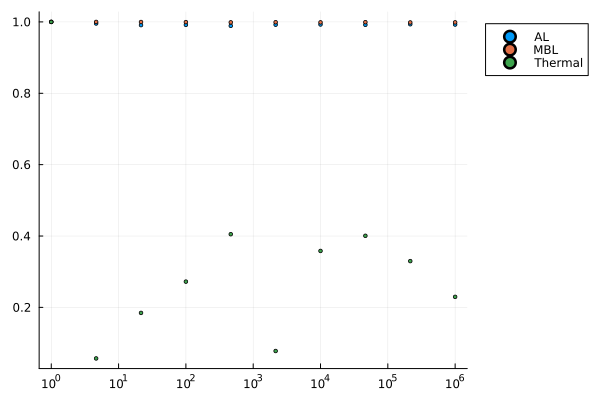

In [17]:

Plots.scatter(tlist,[y1,y2,y3],ms=2,label=["AL" "MBL" "Thermal"],legend=:outertopright,xscale=:log10)

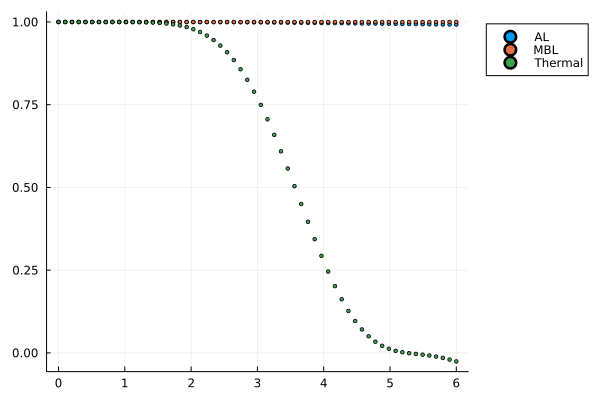

In [18]:
tlist = range(0,6,length=60);
y1 = real([sum([inf_otoc(X,X; t=t,hamiltonian=zhai1,nbit=nbit, i=5,j=1) for _ in 1:10000])/10000 for t in tlist]);
y2 = real([sum([inf_otoc(X,X; t=t,hamiltonian=zhai2,nbit=nbit, i=5,j=1) for _ in 1:10000])/10000 for t in tlist]);
y3 = real([inf_otoc(X,X; t=t,hamiltonian=zhai3,nbit=nbit, i=5,j=1)  for t in tlist]);
Plots.scatter(tlist,[y1,y2,y3],ms=2,label=["AL" "MBL" "Thermal"],legend=:outertopright)

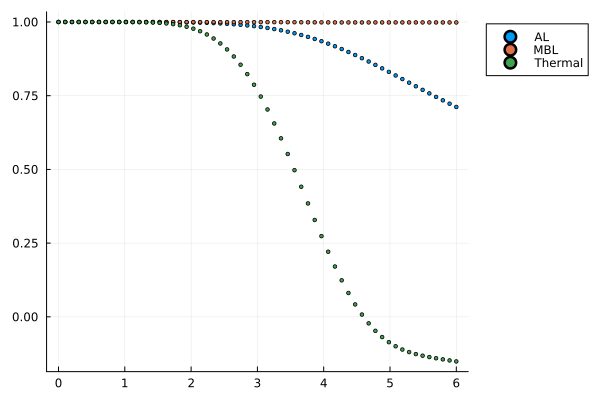

In [19]:
tlist = range(0,6,length=60);
y1 = real([sum([inf_otoc(X,Y; t=t,hamiltonian=zhai1,nbit=nbit, i=5,j=1) for _ in 1:10000])/10000 for t in tlist]);
y2 = real([sum([inf_otoc(X,Y; t=t,hamiltonian=zhai2,nbit=nbit, i=5,j=1) for _ in 1:10000])/10000 for t in tlist]);
y3 = real([inf_otoc(X,Y; t=t,hamiltonian=zhai3,nbit=nbit, i=5,j=1)  for t in tlist]);
Plots.scatter(tlist,[y1,y2,y3],ms=2,label=["AL" "MBL" "Thermal"],legend=:outertopright)

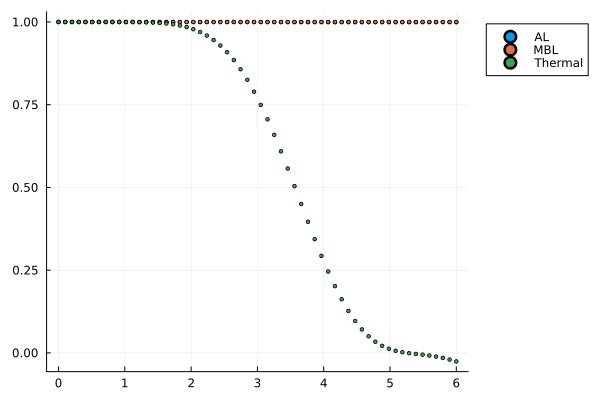

In [18]:
tlist = range(0,6,length=60);
y1 = real([sum([inf_otoc(X,Z; t=t,hamiltonian=zhai1,nbit=nbit, i=5,j=1) for _ in 1:10000])/10000 for t in tlist]);
y2 = real([sum([inf_otoc(X,Z; t=t,hamiltonian=zhai2,nbit=nbit, i=5,j=1) for _ in 1:10000])/10000 for t in tlist]);
y3 = real([inf_otoc(X,X; t=t,hamiltonian=zhai3,nbit=nbit, i=5,j=1)  for t in tlist]);
Plots.scatter(tlist,[y1,y2,y3],ms=2,label=["AL" "MBL" "Thermal"],legend=:outertopright)

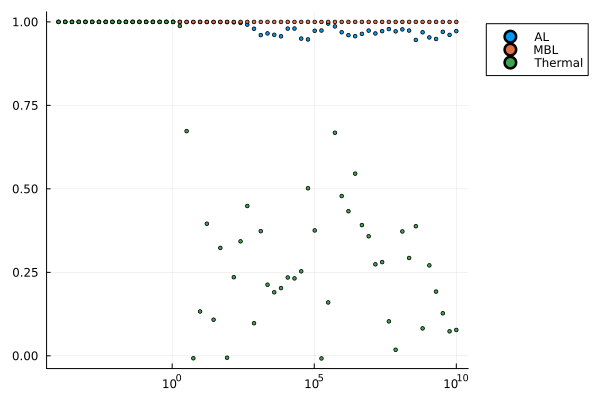

In [16]:
tlist = 10 .^ range(-4,10,length = 60);
y1 = real([sum([inf_otoc(X,X; t=t,hamiltonian=zhai1,nbit=nbit, i=5,j=1) for _ in 1:1000])/1000 for t in tlist]);
y2 = real([sum([inf_otoc(X,X; t=t,hamiltonian=zhai2,nbit=nbit, i=5,j=1) for _ in 1:1000])/1000 for t in tlist]);
y3 = real([sum([inf_otoc(X,X; t=t,hamiltonian=zhai3,nbit=nbit, i=5,j=1) for _ in 1:1000])/1000 for t in tlist]);
Plots.scatter(tlist,[y1,y2,y3],ms=2,label=["AL" "MBL" "Thermal"],legend=:outertopright,xscale=:log10)

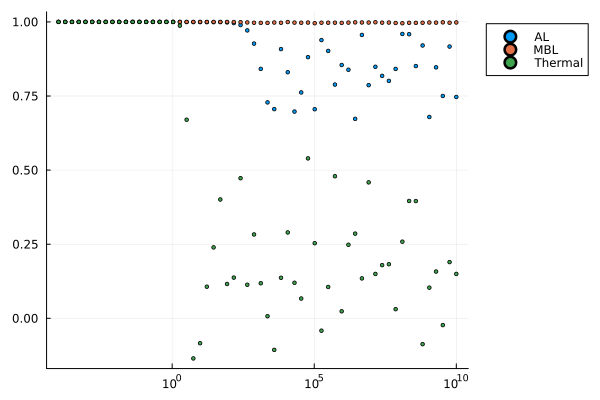

In [19]:
tlist = 10 .^ range(-4,10,length = 60);
y1 = real([sum([inf_otoc(X,Y; t=t,hamiltonian=zhai1,nbit=nbit, i=5,j=1) for _ in 1:1000])/1000 for t in tlist]);
y2 = real([sum([inf_otoc(X,Y; t=t,hamiltonian=zhai2,nbit=nbit, i=5,j=1) for _ in 1:1000])/1000 for t in tlist]);
y3 = real([sum([inf_otoc(X,Y; t=t,hamiltonian=zhai3,nbit=nbit, i=5,j=1) for _ in 1:1000])/1000 for t in tlist]);
Plots.scatter(tlist,[y1,y2,y3],ms=2,label=["AL" "MBL" "Thermal"],legend=:outertopright,xscale=:log10)

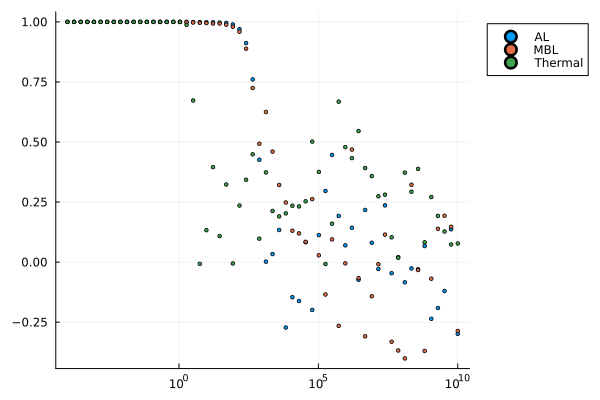

In [21]:
tlist = 10 .^ range(-4,10,length = 60);
y1 = real([sum([inf_otoc(Z,Z; t=t,hamiltonian=zhai1,nbit=nbit, i=5,j=1) for _ in 1:1000])/1000 for t in tlist]);
y2 = real([sum([inf_otoc(Z,Z; t=t,hamiltonian=zhai2,nbit=nbit, i=5,j=1) for _ in 1:1000])/1000 for t in tlist]);
y3 = real([sum([inf_otoc(Z,Z; t=t,hamiltonian=zhai3,nbit=nbit, i=5,j=1) for _ in 1:1000])/1000 for t in tlist]);
Plots.scatter(tlist,[y1,y2,y3],ms=2,label=["AL" "MBL" "Thermal"],legend=:outertopright,xscale=:log10)

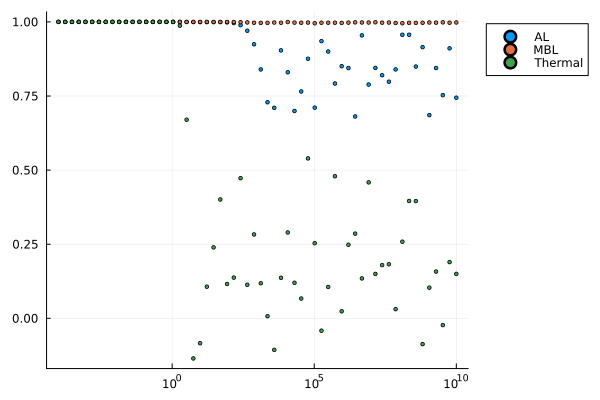

In [20]:
tlist = 10 .^ range(-4,10,length = 60);
y1 = real([sum([inf_otoc(X,Z; t=t,hamiltonian=zhai1,nbit=nbit, i=5,j=1) for _ in 1:1000])/1000 for t in tlist]);
y2 = real([sum([inf_otoc(X,Z; t=t,hamiltonian=zhai2,nbit=nbit, i=5,j=1) for _ in 1:1000])/1000 for t in tlist]);
y3 = real([sum([inf_otoc(X,Z; t=t,hamiltonian=zhai3,nbit=nbit, i=5,j=1) for _ in 1:1000])/1000 for t in tlist]);
Plots.scatter(tlist,[y1,y2,y3],ms=2,label=["AL" "MBL" "Thermal"],legend=:outertopright,xscale=:log10)

## 8 - Sites 
### Interval is 5, according to SinceBullenti,

In [25]:
## 6nbits

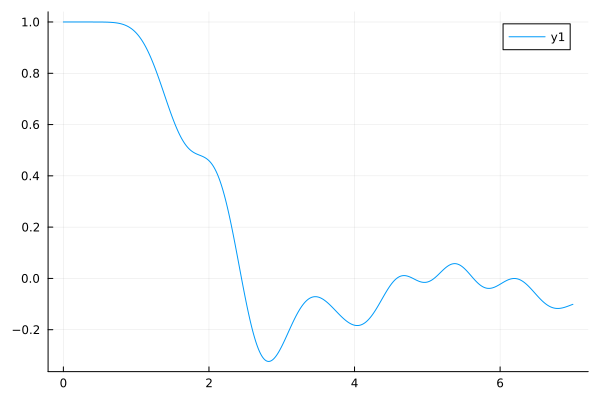

In [26]:
nmr1 = nmr_ising(4,1,0);
nmr2 = nmr_ising(4,1.05,0.5);
tlist = range(0,7,1000);
otoc1 = real([inf_otoc(X, Y;t=t,hamiltonian=nmr2,nbit=4,i=1,j=4) for t in tlist]);
plot(tlist,otoc1)

In [ ]:
function heisenberg(nbit::Int;periodic::Bool=false)
    sx = i ->  1/2 * put(nbit, i=>X)
    sy = i ->  1/2 * put(nbit, i=>Y)
    sz = i ->  1/2 * put(nbit, i=>Z)
    hopping = map(1:nbit) do i
		j = i%(nbit-1) + 1
		(sx(i)*sx(j)+sy(i)*sy(j)+sz(i)*sz(j))
	end |> sum
    return hopping
end
hprime = heisenberg(8)
yprime = real([inf_otoc(X,X;t=t, hamiltonian=h, nbit=nbit,i=8,j=1) for t Base.RangeVecIntList])
plot(tlist,yprime)

In [ ]:
hei0 = hamiltonian(nbit,0)
hei1 = hamiltonian(nbit,5); #ETH
hei2 = hamiltonian(nbit,40); #MBL
# W = 0
otoc0 = real([inf_otoc(X, X;t=t,hamiltonian=hei0,nbit=nbit,i=1,j=8) for t in tlist]);
# ETH OTOC
otoc1 = real([inf_otoc(X, X;t=t,hamiltonian=hei1,nbit=nbit,i=1,j=8) for t in tlist]);
# MBL OTOC
otoc2 = real([inf_otoc(X, X;t=t,hamiltonian=hei2,nbit=nbit,i=1,j=8) for t in tlist]);

In [ ]:
scatter(tlist,[otoc0, otoc1, otoc2],ms=2,label=["W=0" "ETH" "MBL"])

In [ ]:
log10.(1:1e5)

In [ ]:
zhai1 = xxz(nbit,10,0,50); #AL
zhai2 = xxz(nbit,10,2,50); #MBL
zhai3 = xxz(nbit,10,2,0); #thermal